In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

%load_ext autoreload
%autoreload 2

In [2]:
df_dengue = pd.read_csv('../data/clean/dengue_cases.csv', index_col=0)
df_dengue

,Cases
2009-01-04,67.0
2009-01-11,50.0
2009-01-18,46.0
2009-01-25,67.0
2009-02-01,60.0
...,...
2017-11-26,20.0
2017-12-03,29.0
2017-12-10,29.0
2017-12-17,22.0


In [3]:
df_weather = pd.read_csv('../data/clean/weather_data.csv', header=[0,1], index_col=[0])
df_weather

RAINFALL                    TMAX  TMIN      TMEAN    RH        \
                min    max       mean   max   min       mean   min   max   
date                                                                       
2009-01-04      0.0    1.4   0.475000  31.7  23.6  27.775000  82.0  83.0   
2009-01-11      0.0   35.6  12.142857  33.0  23.5  28.385714  82.0  86.0   
2009-01-18      0.0   54.0  14.357143  30.7  22.3  25.771429  87.0  96.0   
2009-01-25      0.0   19.2   2.742857  33.0  23.7  28.385714  80.0  87.0   
2009-02-01      0.0   24.8   4.028571  33.0  23.3  28.100000  77.0  87.0   
...             ...    ...        ...   ...   ...        ...   ...   ...   
2017-11-26      0.0    9.8   3.257143  33.6  24.2  27.928571  74.0  89.0   
2017-12-03      0.0    0.4   0.057143  34.1  24.2  29.528571  74.0  80.0   
2017-12-10      0.0  109.8  24.342857  35.0  24.4  29.457143  72.0  81.0   
2017-12-17      0.0   31.0  10.142857  34.4  24.0  28.328571  68.0  89.0   
2017-12-24      0.0   39.4   6.128571  34.0  23.6  28.550000  70.0  86.0   

                      WIND SPEED  
                 mean       mean  
date                              
2009-01-04  82.750000   2.250000  
2009-01-11  83.857143   2.000000  
2009-01-18  90.428571   2.714286  
2009-01-25  83.428571   1.571429  
2009-02-01  82.285714   2.285714  
...               ...        ...  
2017-11-26  82.285714   1.714286  
2017-12-03  76.571429   2.142857  
2017-12-10  76.000000   1.857143  
2017-12-17  78.000000   1.285714  
2017-12-24  78.642857   1.857143  

[468 rows x 10 columns]

In [4]:
df_merged = pd.merge(df_dengue, df_weather, left_index=True, right_index=True)
df_merged.columns = ['Cases', 'RAINFALL min', 'RAINFALL max', 'RAINFALL mean', 'TMAX', 'TMIN', 'TMEAN', 'RH min', 'RH max',
                    'RH mean', 'WINDSPEED mean']
df_merged

,Cases,RAINFALL min,RAINFALL max,RAINFALL mean,TMAX,TMIN,TMEAN,RH min,RH max,RH mean,WINDSPEED mean
2009-01-04,67.0,0.0,1.4,0.475000,31.7,23.6,27.775000,82.0,83.0,82.750000,2.250000
2009-01-11,50.0,0.0,35.6,12.142857,33.0,23.5,28.385714,82.0,86.0,83.857143,2.000000
2009-01-18,46.0,0.0,54.0,14.357143,30.7,22.3,25.771429,87.0,96.0,90.428571,2.714286
2009-01-25,67.0,0.0,19.2,2.742857,33.0,23.7,28.385714,80.0,87.0,83.428571,1.571429
2009-02-01,60.0,0.0,24.8,4.028571,33.0,23.3,28.100000,77.0,87.0,82.285714,2.285714
...,...,...,...,...,...,...,...,...,...,...,...
2017-11-26,20.0,0.0,9.8,3.257143,33.6,24.2,27.928571,74.0,89.0,82.285714,1.714286
2017-12-03,29.0,0.0,0.4,0.057143,34.1,24.2,29.528571,74.0,80.0,76.571429,2.142857
2017-12-10,29.0,0.0,109.8,24.342857,35.0,24.4,29.457143,72.0,81.0,76.000000,1.857143
2017-12-17,22.0,0.0,31.0,10.142857,34.4,24.0,28.328571,68.0,89.0,78.000000,1.285714


In [5]:
df_merged.index = pd.to_datetime(df_merged.index)
# df_merged.index = df_merged.index.to_period('W')
df_merged

,Cases,RAINFALL min,RAINFALL max,RAINFALL mean,TMAX,TMIN,TMEAN,RH min,RH max,RH mean,WINDSPEED mean
2009-01-04,67.0,0.0,1.4,0.475000,31.7,23.6,27.775000,82.0,83.0,82.750000,2.250000
2009-01-11,50.0,0.0,35.6,12.142857,33.0,23.5,28.385714,82.0,86.0,83.857143,2.000000
2009-01-18,46.0,0.0,54.0,14.357143,30.7,22.3,25.771429,87.0,96.0,90.428571,2.714286
2009-01-25,67.0,0.0,19.2,2.742857,33.0,23.7,28.385714,80.0,87.0,83.428571,1.571429
2009-02-01,60.0,0.0,24.8,4.028571,33.0,23.3,28.100000,77.0,87.0,82.285714,2.285714
...,...,...,...,...,...,...,...,...,...,...,...
2017-11-26,20.0,0.0,9.8,3.257143,33.6,24.2,27.928571,74.0,89.0,82.285714,1.714286
2017-12-03,29.0,0.0,0.4,0.057143,34.1,24.2,29.528571,74.0,80.0,76.571429,2.142857
2017-12-10,29.0,0.0,109.8,24.342857,35.0,24.4,29.457143,72.0,81.0,76.000000,1.857143
2017-12-17,22.0,0.0,31.0,10.142857,34.4,24.0,28.328571,68.0,89.0,78.000000,1.285714


In [6]:
# drop RH min, RH max, TMAX, RAINFALL max, RAINFALL min when modelling
df_merged = df_merged.drop(['RH min', 'RH max', 'TMAX', 'RAINFALL max', 'RAINFALL min'], axis=1)
df_merged

,Cases,RAINFALL mean,TMIN,TMEAN,RH mean,WINDSPEED mean
2009-01-04,67.0,0.475000,23.6,27.775000,82.750000,2.250000
2009-01-11,50.0,12.142857,23.5,28.385714,83.857143,2.000000
2009-01-18,46.0,14.357143,22.3,25.771429,90.428571,2.714286
2009-01-25,67.0,2.742857,23.7,28.385714,83.428571,1.571429
2009-02-01,60.0,4.028571,23.3,28.100000,82.285714,2.285714
...,...,...,...,...,...,...
2017-11-26,20.0,3.257143,24.2,27.928571,82.285714,1.714286
2017-12-03,29.0,0.057143,24.2,29.528571,76.571429,2.142857
2017-12-10,29.0,24.342857,24.4,29.457143,76.000000,1.857143
2017-12-17,22.0,10.142857,24.0,28.328571,78.000000,1.285714


In [7]:
def create_dataset(data, cols_to_shift=None, split=0.66):
    
    if cols_to_shift:
        # add new date index based on max lag to dframe
        max_lag = cols_to_shift[max(cols_to_shift, key=cols_to_shift.get)]
        df_temp = pd.DataFrame(data, index=data[max_lag:].index.union(pd.date_range(start='1/1/2018', periods=max_lag, freq='W')))
        
        
        # shift columns by value
        for col in cols_to_shift:
            col_lag = cols_to_shift[col]
            df_temp[col] = df_temp[col].shift(col_lag)
        
        # new dframe with cases + features
        cols_to_return = ['Cases'] + list(cols_to_shift.keys())
        data = df_temp[cols_to_return].dropna(subset=list(cols_to_shift.keys()))

    size = int(len(data) * split)
    train, test = data[0:size], data[size:len(data)]
    
    return train, test

In [8]:
def create_forecast_exog(data, index, step=1):
    return data[index:index+step].to_numpy().tolist()

# Grid Search of ARIMA

In [9]:
from itertools import repeat

def create_exog_dict_from_list(col_name, lags):
    return [{k: v} for k, v in zip(repeat(col_name), lags)]

def create_exog_dict(col_name, max_lag):
    return [{k: v} for k, v in zip(repeat(col_name), range(0, max_lag+1))]

In [10]:
from math import sqrt
from multiprocessing import cpu_count
from itertools import repeat
from multiprocessing import Process, Manager, Pool
from warnings import catch_warnings
from warnings import filterwarnings
import traceback
import arimax
import istarmap
from tqdm import tqdm


# grid search configs
def grid_search(cfg, exog_list, n_step=1, parallel=True):
    data = df_merged
    manager = Manager()
    scores = manager.list()
    print('starting grid search')
    if __name__ == '__main__':
        try:
            with Pool(cpu_count()-1) as pool:
                it = zip(repeat(data), repeat(scores), repeat(cfg), repeat(n_step), exog_list)
                for _ in tqdm(pool.istarmap(arimax.score_model, list(it)), total=len(list(it))):
                    pass
        except Exception as e:
            raise e
    # remove empty results
    scores = list([r for r in scores if r[1] != None])
    # sort configs by error, asc
    scores.sort(key=lambda tup: tup[1])
    return scores

# plot predicted of best model
def plot_modelz(predicted):
    plt.figure(figsize=(12, 6), dpi=80)
    plt.plot(df_merged['Cases'], color='C0')
    plt.plot(predicted, color='red')
    plt.show()

# create a set of sarima configs to try
def exog_configs(week):
    features = list()
    # define config lists
    if week == 1:
        rainfall = [0, 1, None]
        tmin = [0, 2, None]
        tmean = [0, 1, None]
        rhmean = [0, 3, None]
        windspeed = [0, 1, None]
    elif week == 4:
        rainfall = [0, 6, None]
        tmin = [0, 4, None]
        tmean = [0, 6, None]
        rhmean = [4, 6, None]
        windspeed = [6, 9, None]
    else:
        rainfall = [5, 6, None]
        tmin = [4, 8, None]
        tmean = [5, 6, None]
        rhmean = [2, 4, None]
        windspeed = [11, 12, None]
        
    rainfall = create_exog_dict_from_list('RAINFALL mean', rainfall)
    tmin = create_exog_dict_from_list('TMIN', tmin)
    tmean = create_exog_dict_from_list('TMEAN', tmean)
    rhmean = create_exog_dict_from_list('RH mean', rhmean)
    windspeed = create_exog_dict_from_list('WINDSPEED mean', windspeed)

    # create config instances
    for r in rainfall:
        for t1 in tmin:
            for t2 in tmean:
                for rh in rhmean:
                    for w in windspeed:
                        cfg = {**r, **t1, **t2, **rh, **w}
                        features.append(cfg)
    return features

In [11]:
[exog_configs(1)[242]]

[{'RAINFALL mean': None,
  'TMIN': None,
  'TMEAN': None,
  'RH mean': None,
  'WINDSPEED mean': None}]

# 1 week forecasting

0it [00:00, ?it/s]

starting grid search


243it [1:56:48, 28.84s/it]


done
{'RAINFALL mean': None, 'TMIN': 0, 'TMEAN': 0, 'RH mean': None, 'WINDSPEED mean': None} 30.836485075788378
{'RAINFALL mean': 0, 'TMIN': None, 'TMEAN': None, 'RH mean': 0, 'WINDSPEED mean': None} 30.931515365100477
{'RAINFALL mean': 0, 'TMIN': None, 'TMEAN': 0, 'RH mean': None, 'WINDSPEED mean': None} 30.93966085651022


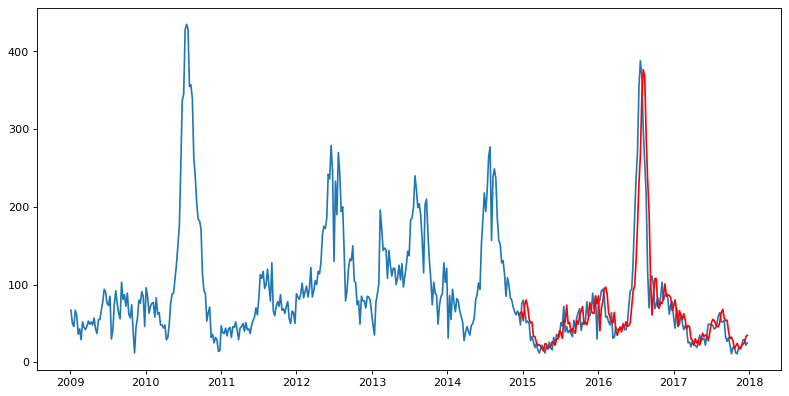

In [12]:
import arimax
# best model for arima 1 week
cfg = [(1, 0, 3)]
# TMIN	TMEAN	RH mean	WINDSPEED mean
exog_list = exog_configs(1)

# 1 week forecast
n_step = 1
# grid search
scores = grid_search(cfg, exog_list, n_step)
print('done')
# list top 3 configs
for lag, error, p in scores[:3]:
    print(lag, error)
plot_modelz(scores[0][2])

In [ ]:
{'RAINFALL mean': 5,
  'TMIN': None,
  'TMEAN': 3,
  'RH mean': None,
  'WINDSPEED mean': None}]

In [ ]:
cases 99 na na
rainfall 101
tmean 101

In [ ]:
cases 99 na na
100
100

# 4 week forecasting

In [ ]:
# # best model for arima 1 week
# cfg = [(1, 0, 3)]
# # TMIN	TMEAN	RH mean	WINDSPEED mean
# exog_list = exog_configs(4)

# # 4 week forecast
# n_step = 4
# # grid search
# scores = grid_search(cfg, exog_list, n_step)
# print('done')
# # list top 3 configs
# for lag, error, p in scores[:3]:
#     print(lag, error)
# plot_modelz(scores[0][2])

0it [00:00, ?it/s]

starting grid search


12it [08:29, 35.58s/it]

# 12 week forecasting

In [ ]:
# # best model for arima 1 week
# cfg = [(1, 0, 3)]
# # TMIN	TMEAN	RH mean	WINDSPEED mean
# exog_list = exog_configs(12)

# # 1 week forecast
# n_step = 12
# # grid search
# scores = grid_search(cfg, exog_list, n_step)
# print('done')
# # list top 3 configs
# for lag, error, p in scores[:3]:
#     print(lag, error)
# plot_modelz(scores[0][2])